In [1]:
library(eulerr)
library(data.table)

In [2]:
get_pvec <- function(P1, P2, P3, P12, P13, P23, P123) {
    p1 = P1 - P12 - P13 + P123
    p2 = P2 - P12 - P23 + P123
    p3 = P3 - P13 - P23 + P123
    p12 = P12 - P123
    p13 = P13 - P123
    p23 = P23 - P123
    p123 = P123
    pvec = c(p1, p2, p3, p12, p13, p23, p123)
    return ( pvec/sum(pvec) )
}

get_entropy <- function(pvec) {
    entropy = 0
    for ( p in pvec ) {
        entropy = entropy + ifelse(p > 0, -p*log(p), 0)
    }
    return ( entropy )    
}

get_p123_with_max_entropy <- function(P1, P2, P3, P12, P13, P23) {
    max_P123 = min(P12, P13, P23)
    min_P123 = max(0, P12+P13-P1, P12+P23-P2, P13+P23-P3)
    print(paste0("Min_p123 = ", min_P123, ", Max_p123 = ", max_P123))
    max_entropy = 0
    max_entropy_P123 = 0
    for ( P123 in seq(from=min_P123, to=max_P123, length.out=1001) ) {
        pvec = get_pvec(P1, P2, P3, P12, P13, P23, P123)
        entropy = get_entropy(pvec)
        if ( entropy > max_entropy ) {
            max_entropy = entropy   
            max_entropy_P123 = P123
        }
    }
    return ( max_entropy_P123 )
}

In [2]:
# figures/sa_adhd_gge.parameters.csv
# figures/uc_ps_ms_sep12.parameters.csv
fname <- "figures/t2d_hdl_egfr_paper_oct30.parameters.csv"
labels <- c("T2D", "HDL", "EGFR")
outf <- "figures/t2d_hdl_egfr_paper_oct30.euler.model.draft"
colors <- c('#2166AC', '#D1E5F0', '#92C5DE')
# "#77AADD", "#EE8866", "#EEDD88" - bdbiobank_bdclinical_bdselfreport
# "#77AADD", "#FFAABB", "#44BB99" - bdbiobank_bd1_bd2
# "#332288", "#88CCEE", "#44AA99" - blues
# "#CC6677", "#882255", "#AA4499" - reds
# "#DDCC77", "#999933", "#117733" - yellow-greens
# purple: "#D1BBD7", "#AE76A3", "#882E72" 
# blue: '#2166AC', '#D1E5F0', '#92C5DE'
# green:  '#1B7837', '#D9F0D3', '#ACD39E'
# red: '#B2182B', '#FDDBC7', '#F4A582'
# #77AADD SCZ
# #EE8866 ADHD
# #EEDD88 GGE
# #FFAABB COG
# #99DDFF TH
# #44BB99 SA
# #BBCC33 AUD
# #AAAA00 MIG
# #DDDDDD BMI Height GAD BIP MDD
# #77AADD bdbiobank 
# #EE8866 bdclinical
# #EEDD88 bdselfreport
df <- fread(fname)
dim(df)

[1] 16 28

In [3]:
i_best_run = which.min(df$rank_p_proportion_deviation_from_median)
#i_best_run = 6 # ring2:6
print(paste(i_best_run, "is the best run."))
best = df[i_best_run]

[1] "9 is the best run."


In [4]:
acceptable_negative_gap = -1E-6
p1 <- best$p_1 - best$p_12 - best$p_13 + best$p_123
if (p1<0 & p1>acceptable_negative_gap) {p1 <- 0}
p2 <- best$p_2 - best$p_12 - best$p_23 + best$p_123
if (p2<0 & p2>acceptable_negative_gap) {p2 <- 0}
p3 <- best$p_3 - best$p_13 - best$p_23 + best$p_123
if (p3<0 & p3>acceptable_negative_gap) {p3 <- 0}
p12 <- best$p_12 - best$p_123
if (p12<0 & p12>acceptable_negative_gap) {p12 <- 0}
p13 <- best$p_13 - best$p_123
if (p13<0 & p13>acceptable_negative_gap) {p13 <- 0}
p23 <- best$p_23 - best$p_123
if (p23<0 & p23>acceptable_negative_gap) {p23 <- 0}
p123 <- best$p_123
if (p123<0 & p1>acceptable_negative_gap) {p123 <- 0}
print(p1)
print(p2)
print(p3)
print(p12)
print(p13)
print(p23)
print(p123)
total = p1 + p2 + p3 + p12 + p13 + p23 + p123
factor = 100 / total
vec2plot = c("1"=round(factor*p1,0),"2"=round(factor*p2,0),"3"=round(factor*p3,0),"1&2"=round(factor*p12,0),"1&3"=round(factor*p13,0),"2&3"=round(factor*p23,0),"1&2&3"=round(factor*p123,0))

[1] 0.000204617
[1] 7.937577e-05
[1] 0.0002211149
[1] 0.0001419285
[1] 4.570996e-05
[1] 3.606451e-05
[1] 0.0001241166


In [5]:
fit <- euler(vec2plot, input="disjoint", shape="ellipse")

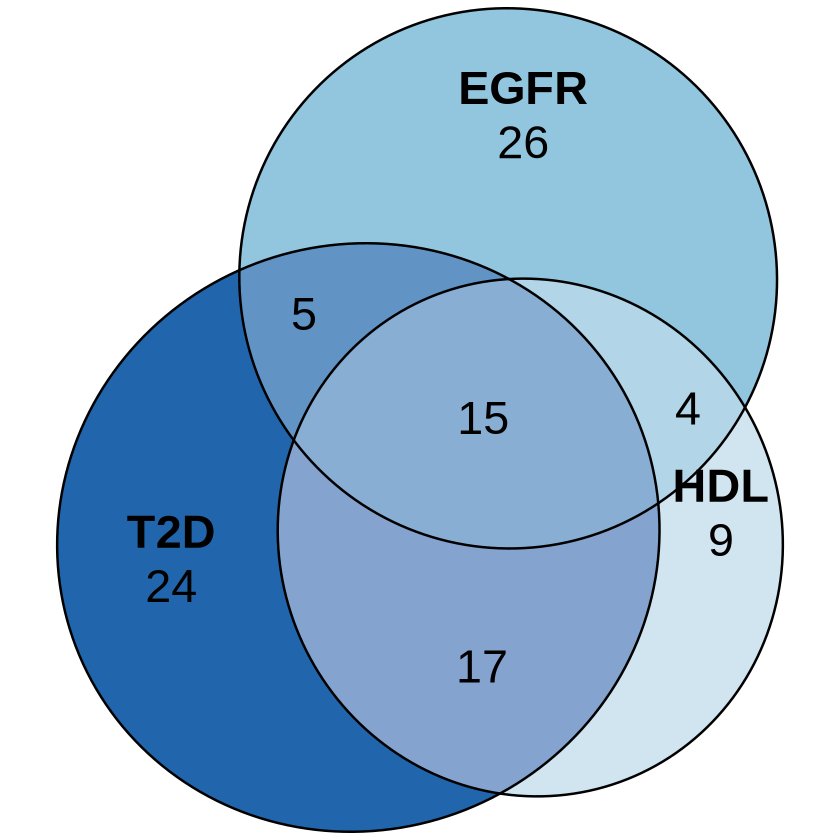

In [6]:
# Show, don't plot
label_fontsize = 28
number_fontsize = 28
edge_lty = 1:1
edge_color = "black"
alpha = 1
plot(fit,
     fills = list(fill=colors, alpha=alpha),
     labels = list(labels=labels, col="black", fontsize=label_fontsize),
     edges = list(col=edge_color, lex=2),
     lty=edge_lty,
     quantities = list(type="counts", cex=1, fontsize=number_fontsize))

In [7]:
## Plot
png(filename=paste0(outf,".png"), width=600, height=600, units="px", pointsize=12, bg="transparent", res=NA)
plot(fit,
     fills = list(fill=colors, alpha=alpha),
     labels = list(labels=labels, col="black", fontsize=label_fontsize),
     edges = list(col=edge_color, lex=2),
     lty = edge_lty,
     quantities = list(type="counts", cex=1, fontsize=number_fontsize))
dev.off()

## Plot
svg(filename=paste0(outf,".svg"), onefile=TRUE)
plot(fit,
     fills = list(fill=colors, alpha=alpha),
     labels = list(labels=labels, col="black", fontsize=label_fontsize),
     edges = list(col=edge_color, lex=2),
     lty = edge_lty,
     quantities = list(type="counts", cex=1, fontsize=number_fontsize))
dev.off()

png 
  2

png 
  2

[1] "0.000102, 0.000124"

[1] 0.0001829614
[1] 5.772014e-05
[1] 0.0001994593
[1] 0.0001635841
[1] 6.73656e-05
[1] 5.772014e-05
[1] 0.000102461


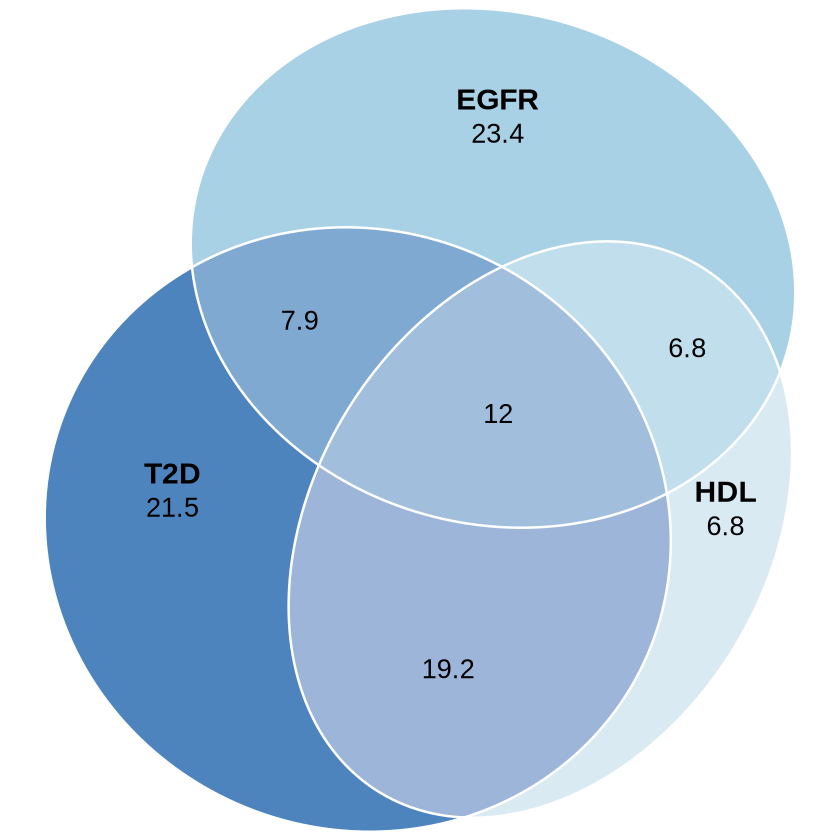

In [8]:
# plot expected
max_p123 = min(best$p_12,best$p_13,best$p_23)
min_p123 = max(0,best$p_12+best$p_13-best$p_1,best$p_12+best$p_23-best$p_2,best$p_13+best$p_23-best$p_3)
expected_p123 =  0.5*(min_p123 + max_p123)
sprintf("%f, %f", expected_p123, best$p_123)

acceptable_negative_gap = -3E-5
p1 <- best$p_1 - best$p_12 - best$p_13 + expected_p123
if (p1<0 & p1>acceptable_negative_gap) {p1 <- 0}
p2 <- best$p_2 - best$p_12 - best$p_23 + expected_p123
if (p2<0 & p2>acceptable_negative_gap) {p2 <- 0}
p3 <- best$p_3 - best$p_13 - best$p_23 + expected_p123
if (p3<0 & p3>acceptable_negative_gap) {p3 <- 0}
p12 <- best$p_12 - expected_p123
if (p12<0 & p12>acceptable_negative_gap) {p12 <- 0}
p13 <- best$p_13 - expected_p123
if (p13<0 & p13>acceptable_negative_gap) {p13 <- 0}
p23 <- best$p_23 - expected_p123
if (p23<0 & p23>acceptable_negative_gap) {p23 <- 0}
p123 <- expected_p123
if (p123<0 & p1>acceptable_negative_gap) {p123 <- 0}
print(p1)
print(p2)
print(p3)
print(p12)
print(p13)
print(p23)
print(p123)
vec2plot = c("1"=round(factor*p1,1),"2"=round(factor*p2,1),"3"=round(factor*p3,1),"1&2"=round(factor*p12,1),"1&3"=round(factor*p13,1),"2&3"=round(factor*p23,1),"1&2&3"=round(factor*p123,1))
fit <- euler(vec2plot, input="disjoint", shape="ellipse")
# Show, don't plot
plot(fit,
     fills = list(fill=colors, alpha=0.8),
     labels = list(labels=labels, col="black", fontsize=18),
     edges = list(col="white", lex=2),
     quantities = list(type="counts", cex=0.9, fontsize=18)) # quantities=c("3","3","3","2","2","2","1")

In [9]:
# Plot
outf = "figures/simu_maf1_diffusion2_sep12.euler.expected.draft.png"
png(filename=outf, width=600, height=600, units="px", pointsize=12, bg="transparent", res=NA)
plot(fit,
     fills = list(fill=colors, alpha=0.8),
     labels = list(labels=labels, col="black", fontsize=18),
     edges = list(col="white", lex=2),
     quantities = list(type="counts", cex=0.9, fontsize=18))
dev.off()

png 
  2

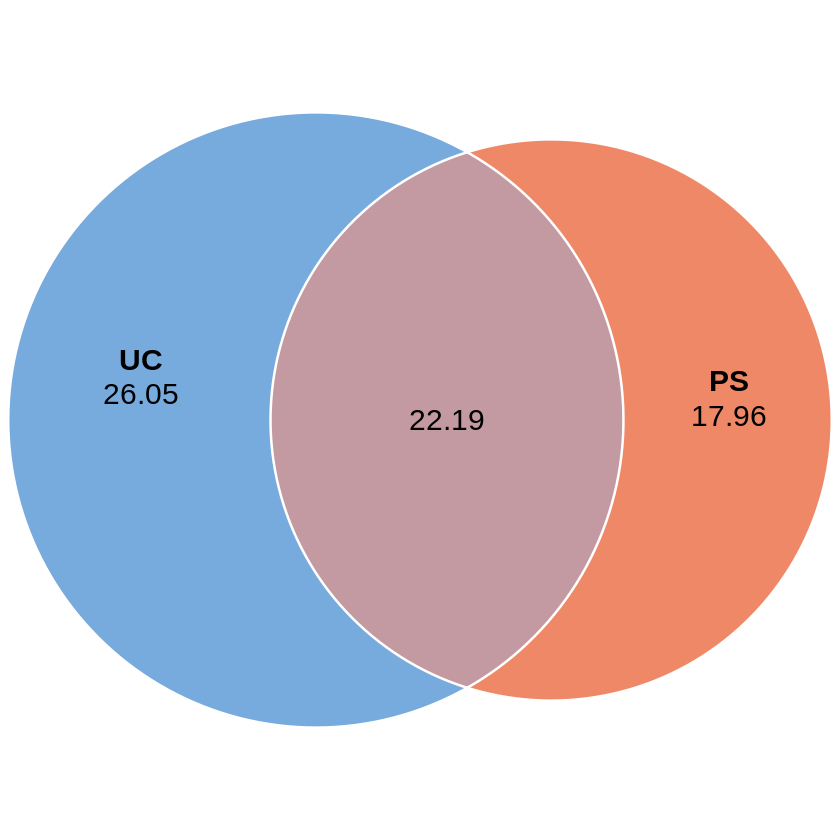

In [94]:
vec2plot = c("1"=round(factor*best$p_1,2),"2"=round(factor*best$p_2,2),"1&2"=round(factor*best$p_12,2))
fit <- euler(vec2plot, input="union")
plot(fit,
     fills = list(fill=colors[c(1,2)], alpha=1),
     labels = list(labels=labels[c(1,2)], col="black", fontsize=18),
     edges = list(col="white", lex=2),
     quantities = list(type="counts", fontsize=18))

In [95]:
# Plot
outf = "figures/uc_ps.draft.model.euler.png"
png(filename=outf, width=600, height=600, units="px", pointsize=12, bg="transparent", res=NA)
plot(fit,
     fills = list(fill=colors[c(1,2)], alpha=1),
     labels = list(labels=labels[c(1,2)], col="black", fontsize=18),
     edges = list(col="white", lex=2),
     quantities = list(type="counts", fontsize=18))
dev.off()

png 
  2

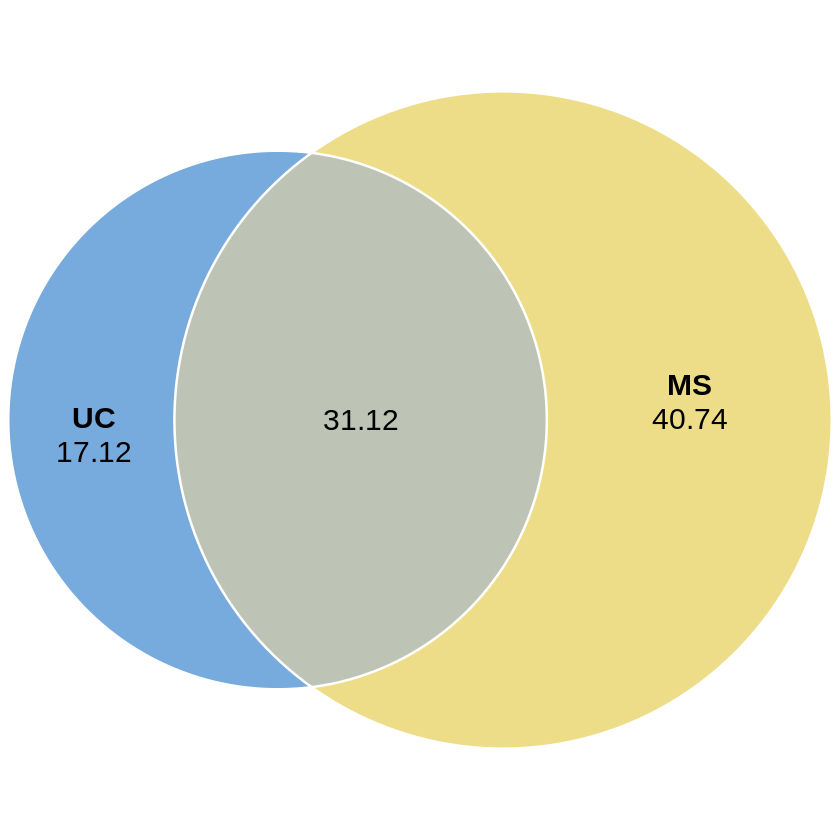

In [96]:
vec2plot = c("1"=round(factor*best$p_1,2),"2"=round(factor*best$p_3,2),"1&2"=round(factor*best$p_13,2))
fit <- euler(vec2plot, input="union")
plot(fit,
     fills = list(fill=colors[c(1,3)], alpha=1),
     labels = list(labels=labels[c(1,3)], col="black", fontsize=18),
     edges = list(col="white", lex=2),
     quantities = list(type="counts", fontsize=18))

In [97]:
# Plot
outf = "figures/uc_ms.draft.model.euler.png"
png(filename=outf, width=600, height=600, units="px", pointsize=12, bg="transparent", res=NA)
plot(fit,
     fills = list(fill=colors[c(1,3)], alpha=1),
     labels = list(labels=labels[c(1,3)], col="black", fontsize=18),
     edges = list(col="white", lex=2),
     quantities = list(type="counts", fontsize=18))
dev.off()

png 
  2

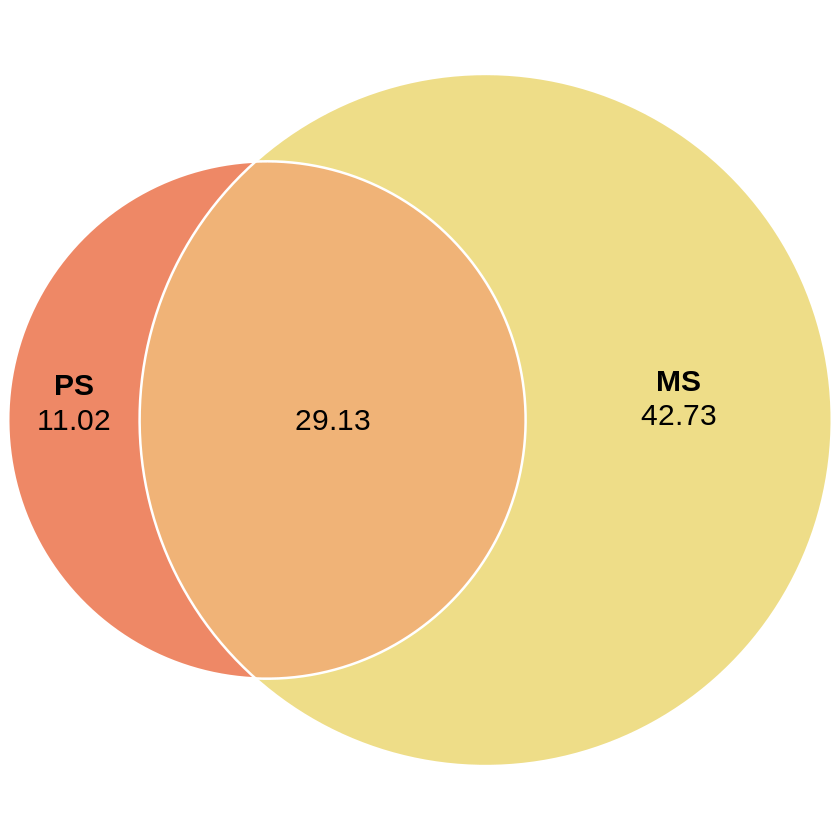

In [98]:
vec2plot = c("1"=round(factor*best$p_2,2),"2"=round(factor*best$p_3,2),"1&2"=round(factor*best$p_23,2))
fit <- euler(vec2plot, input="union")
plot(fit,
     fills = list(fill=colors[c(2,3)], alpha=1),
     labels = list(labels=labels[c(2,3)], col="black", fontsize=18),
     edges = list(col="white", lex=2),
     quantities = list(type="counts", fontsize=18))

In [99]:
# Plot
outf = "figures/ps_ms.draft.model.euler.png"
png(filename=outf, width=600, height=600, units="px", pointsize=12, bg="transparent", res=NA)
plot(fit,
     fills = list(fill=colors[c(2,3)], alpha=1),
     labels = list(labels=labels[c(2,3)], col="black", fontsize=18),
     edges = list(col="white", lex=2),
     quantities = list(type="counts", fontsize=18))
dev.off()

png 
  2

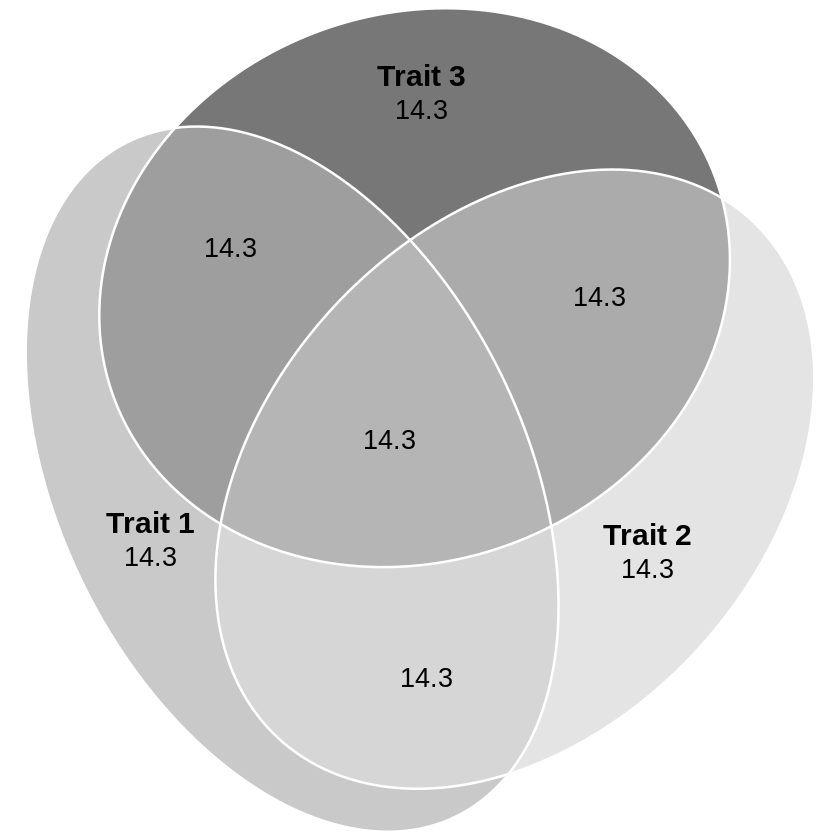

In [289]:
p1 = total/7
p2 = total/7
p3 = total/7
p12 = total/7
p13 = total/7
p23 = total/7
p123 = total/7
vec2plot = c("1"=round(factor*p1,1),"2"=round(factor*p2,1),"3"=round(factor*p3,1),"1&2"=round(factor*p12,1),"1&3"=round(factor*p13,1),"2&3"=round(factor*p23,1),"1&2&3"=round(factor*p123,1))
fit <- euler(vec2plot, input="disjoint", shape="ellipse")
# Show, don't plot
plot(fit,
     fills = list(fill=colors, alpha=0.8),
     labels = list(labels=labels, col="black", fontsize=18),
     edges = list(col="white", lex=2),
     quantities = list(type="counts", cex=0.9, fontsize=18))

In [290]:
# Plot
outf = "figures/simu_maf1_diffusion2_sep12.euler.true.draft.png"
png(filename=outf, width=600, height=600, units="px", pointsize=12, bg="transparent", res=NA)
plot(fit,
     fills = list(fill=colors, alpha=0.8),
     labels = list(labels=labels, col="black", fontsize=18),
     edges = list(col="white", lex=2),
     quantities = list(type="counts", cex=0.9, fontsize=18))
dev.off()

png 
  2

In [301]:
## Plot
svglite(filename="figures/test2.svg")
plot(fit,
     fills = list(fill=colors, alpha=0.8),
     labels = list(labels=labels, col="black", fontsize=18),
     edges = list(col="white", lex=2),
     quantities = list(type="counts", cex=0.9, fontsize=18))
dev.off()

png 
  2

# Figures for paper

In [101]:
# Figure 1 for paper
outf_prefix = "figure1_dec21"
scenario = "ring" # diffusion core ring
fname <- paste0("figures/simu_maf1_",scenario,"2_sep12.parameters.csv")
labels <- c("Trait 1", "Trait 2", "Trait 3")
outf_model <- paste0("figures/", outf_prefix, ".", scenario, ".euler.model.draft")
outf_naive <- paste0("figures/", outf_prefix, ".", scenario, ".euler.naive.draft")
outf_true <- paste0("figures/", outf_prefix, ".", scenario, ".euler.true.draft")
colors <- c('#B2182B', '#FDDBC7', '#F4A582')
# blue: '#2166AC', '#D1E5F0', '#92C5DE'
# green: '#1B7837', '#D9F0D3', '#ACD39E'
# red: '#B2182B', '#FDDBC7', '#F4A582'
df <- fread(fname)
print(dim(df))
i_best_run = which.min(df$rank_p_proportion_deviation_from_median)
#i_best_run = 6 # ring2:6
print(paste(i_best_run, "is the best run."))
best = df[i_best_run]

acceptable_negative_gap = -1E-6
p1 <- best$p_1 - best$p_12 - best$p_13 + best$p_123
if (p1<0 & p1>acceptable_negative_gap) {p1 <- 0}
p2 <- best$p_2 - best$p_12 - best$p_23 + best$p_123
if (p2<0 & p2>acceptable_negative_gap) {p2 <- 0}
p3 <- best$p_3 - best$p_13 - best$p_23 + best$p_123
if (p3<0 & p3>acceptable_negative_gap) {p3 <- 0}
p12 <- best$p_12 - best$p_123
if (p12<0 & p12>acceptable_negative_gap) {p12 <- 0}
p13 <- best$p_13 - best$p_123
if (p13<0 & p13>acceptable_negative_gap) {p13 <- 0}
p23 <- best$p_23 - best$p_123
if (p23<0 & p23>acceptable_negative_gap) {p23 <- 0}
p123 <- best$p_123
if (p123<0 & p1>acceptable_negative_gap) {p123 <- 0}
total = p1 + p2 + p3 + p12 + p13 + p23 + p123
factor = 100 / total
vec2plot = c("1"=round(factor*p1,0),"2"=round(factor*p2,0),"3"=round(factor*p3,0),"1&2"=round(factor*p12,0),"1&3"=round(factor*p13,0),"2&3"=round(factor*p23,0),"1&2&3"=round(factor*p123,0))

[1] 16 28
[1] "12 is the best run."


png 
  2

png 
  2

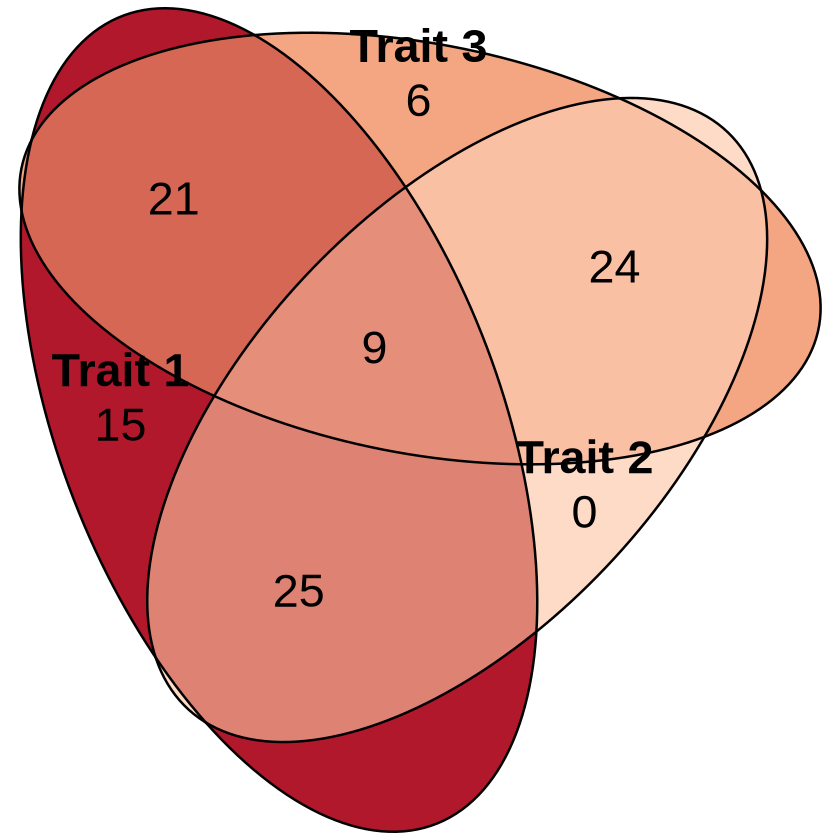

In [102]:
# Show, don't plot
label_fontsize = 28
number_fontsize = 28
edge_lty = 1:1
edge_color = "black"
alpha = 1

fit <- euler(vec2plot, input="disjoint", shape="ellipse")

plot(fit,
     fills = list(fill=colors, alpha=alpha),
     labels = list(labels=labels, col="black", fontsize=label_fontsize),
     edges = list(col=edge_color, lex=2),
     lty=edge_lty,
     quantities = list(type="counts", cex=1, fontsize=number_fontsize))

## Plot
png(filename=paste0(outf_model,".png"), width=600, height=600, units="px", pointsize=12, bg="transparent", res=NA)
plot(fit,
     fills = list(fill=colors, alpha=alpha),
     labels = list(labels=labels, col="black", fontsize=label_fontsize),
     edges = list(col=edge_color, lex=2),
     lty = edge_lty,
     quantities = list(type="counts", cex=1, fontsize=number_fontsize))
dev.off()

## Plot
svg(filename=paste0(outf_model,".svg"), onefile=TRUE)
plot(fit,
     fills = list(fill=colors, alpha=alpha),
     labels = list(labels=labels, col="black", fontsize=label_fontsize),
     edges = list(col=edge_color, lex=2),
     lty = edge_lty,
     quantities = list(type="counts", cex=1, fontsize=number_fontsize))
dev.off()

[1] "Min_p123 = 0.00030043611463771, Max_p123 = 0.00095900379703617"
[1] "Expected_p123 = 0.000573083135150673, Best_p123 = 0.00030043611463771"


png 
  2

png 
  2

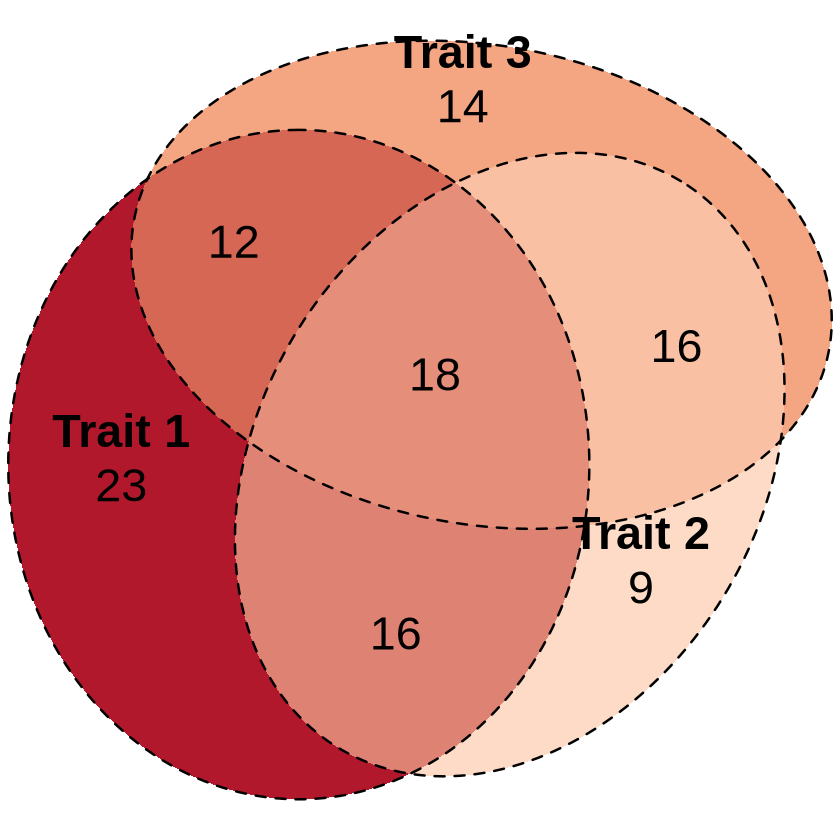

In [103]:
# plot naive expected
expected_p123 =  get_p123_with_max_entropy(best$p_1, best$p_2, best$p_3, best$p_12, best$p_13, best$p_23)
print(paste0("Expected_p123 = ", expected_p123, ", Best_p123 = ", best$p_123))

#max_p123 = min(best$p_12,best$p_13,best$p_23)
#min_p123 = max(0,best$p_12+best$p_13-best$p_1,best$p_12+best$p_23-best$p_2,best$p_13+best$p_23-best$p_3)
#expected_p123 =  0.5*(min_p123 + max_p123)
#sprintf("%f, %f", expected_p123, best$p_123)

acceptable_negative_gap = 1E-6
p1 <- best$p_1 - best$p_12 - best$p_13 + expected_p123
if (p1<0 & p1>acceptable_negative_gap) {p1 <- 0}
p2 <- best$p_2 - best$p_12 - best$p_23 + expected_p123
if (p2<0 & p2>acceptable_negative_gap) {p2 <- 0}
p3 <- best$p_3 - best$p_13 - best$p_23 + expected_p123
if (p3<0 & p3>acceptable_negative_gap) {p3 <- 0}
p12 <- best$p_12 - expected_p123
if (p12<0 & p12>acceptable_negative_gap) {p12 <- 0}
p13 <- best$p_13 - expected_p123
if (p13<0 & p13>acceptable_negative_gap) {p13 <- 0}
p23 <- best$p_23 - expected_p123
if (p23<0 & p23>acceptable_negative_gap) {p23 <- 0}
p123 <- expected_p123
if (p123<0 & p1>acceptable_negative_gap) {p123 <- 0}
vec2plot = c("1"=round(factor*p1,0),"2"=round(factor*p2,0),"3"=round(factor*p3,0),"1&2"=round(factor*p12,0),"1&3"=round(factor*p13,0),"2&3"=round(factor*p23,0),"1&2&3"=round(factor*p123,0))
fit <- euler(vec2plot, input="disjoint", shape="ellipse")

# Show, don't plot
edge_lty = 2:2
edge_color = "black"

plot(fit,
     fills = list(fill=colors, alpha=alpha),
     labels = list(labels=labels, col="black", fontsize=label_fontsize),
     edges = list(col=edge_color, lex=2),
     lty = edge_lty,
     quantities = list(type="counts", cex=1, fontsize=number_fontsize)) # quantities=c("3","3","3","2","2","2","1")

# Plot
png(filename=paste0(outf_naive,".png"), width=600, height=600, units="px", pointsize=12, bg="transparent", res=NA)
plot(fit,
     fills = list(fill=colors, alpha=alpha),
     labels = list(labels=labels, col="black", fontsize=label_fontsize),
     edges = list(col=edge_color, lex=2),
     lty = edge_lty,
     quantities = list(type="counts", cex=1, fontsize=number_fontsize))
dev.off()

## Plot
svg(filename=paste0(outf_naive,".svg"), onefile=TRUE)
plot(fit,
     fills = list(fill=colors, alpha=alpha),
     labels = list(labels=labels, col="black", fontsize=label_fontsize),
     edges = list(col=edge_color, lex=2),
     lty = edge_lty,
     quantities = list(type="counts", cex=1, fontsize=number_fontsize))
dev.off()

png 
  2

png 
  2

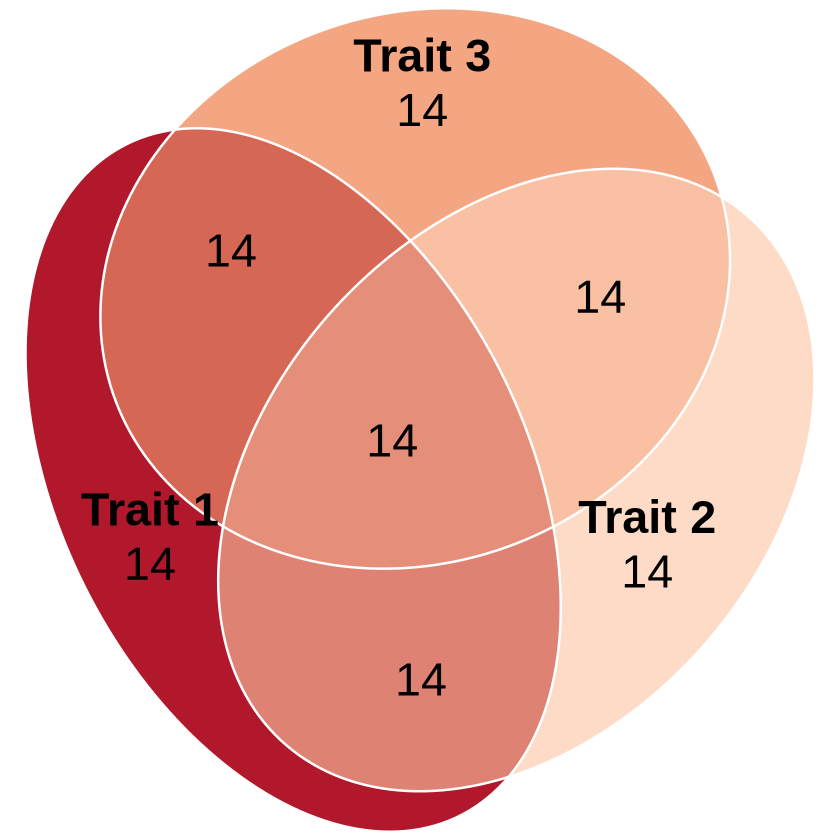

In [93]:
# True
p1 = total/7
p2 = total/7
p3 = total/7
p12 = total/7
p13 = total/7
p23 = total/7
p123 = total/7
vec2plot = c("1"=round(factor*p1,0),"2"=round(factor*p2,0),"3"=round(factor*p3,0),"1&2"=round(factor*p12,0),"1&3"=round(factor*p13,0),"2&3"=round(factor*p23,0),"1&2&3"=round(factor*p123,0))
fit <- euler(vec2plot, input="disjoint", shape="ellipse")

# Show, don't plot
edge_lty = 1:1
edge_color = "white"

plot(fit,
     fills = list(fill=colors, alpha=alpha),
     labels = list(labels=labels, col="black", fontsize=label_fontsize),
     edges = list(col=edge_color, lex=2),
     lty = edge_lty,
     quantities = list(type="counts", cex=1, fontsize=number_fontsize))

# Plot
png(filename=paste0(outf_true,".png"), width=600, height=600, units="px", pointsize=12, bg="transparent", res=NA)
plot(fit,
     fills = list(fill=colors, alpha=alpha),
     labels = list(labels=labels, col="black", fontsize=label_fontsize),
     edges = list(col=edge_color, lex=2),
     lty = edge_lty,
     quantities = list(type="counts", cex=1, fontsize=number_fontsize))
dev.off()

## Plot
svg(filename=paste0(outf_true,".svg"), onefile=TRUE)
plot(fit,
     fills = list(fill=colors, alpha=alpha),
     labels = list(labels=labels, col="black", fontsize=label_fontsize),
     edges = list(col=edge_color, lex=2),
     lty = edge_lty,
     quantities = list(type="counts", cex=1, fontsize=number_fontsize))
dev.off()

In [58]:
# Figure 2 for paper
# figures/sa_adhd_gge.parameters.csv
# figures/uc_ps_ms_sep12.parameters.csv
# nov13: figures/uc_ps_ms.parameters.csv
# nov13: figures/t2d_hdl_egfr_paper_oct30.parameters.csv
outf_prefix = "figure2_aug30"
scenario = "gge_ibs_adhd" # uc_ms_ps t2d_egfr_hdl gge_ibs_adhd
fname <- paste0("figures/",scenario,".parameters.csv")
labels <- c("GGE", "IBS", "ADHD")
outf_model <- paste0("figures/", outf_prefix, ".", scenario, ".euler.model.draft")
outf_naive <- paste0("figures/", outf_prefix, ".", scenario, ".euler.naive.draft")
outf_true <- paste0("figures/", outf_prefix, ".", scenario, ".euler.true.draft")
colors <- c('#D7A9E3FF', '#8BBEE8FF', '#A8D5BAFF')
# https://designwizard.com/blog/colour-combination/
# gge_ibs_adhd : Light Purple (#D7A9E3FF), Light Blue (#8BBEE8FF) and Light Green (#A8D5BAFF)
# t2d_egfr_hdl : Lemon Verbena (#F6EA7BFF), Orange Pop (#FFBA52FF) and Aurora Pink (#E683A9FF)
# uc_ms_ps : Living Coral (#FC766AFF), Spiced Apple (#783937FF) and Peach (#F1AC88FF)
df <- fread(fname)
print(dim(df))
i_best_run = which.min(df$rank_p_proportion_deviation_from_median)
#i_best_run = 6 # ring2:6
print(paste(i_best_run, "is the best run."))
best = df[i_best_run]

acceptable_negative_gap = -1E-6
p1 <- best$p_1 - best$p_12 - best$p_13 + best$p_123
if (p1<0 & p1>acceptable_negative_gap) {p1 <- 0}
p2 <- best$p_2 - best$p_12 - best$p_23 + best$p_123
if (p2<0 & p2>acceptable_negative_gap) {p2 <- 0}
p3 <- best$p_3 - best$p_13 - best$p_23 + best$p_123
if (p3<0 & p3>acceptable_negative_gap) {p3 <- 0}
p12 <- best$p_12 - best$p_123
if (p12<0 & p12>acceptable_negative_gap) {p12 <- 0}
p13 <- best$p_13 - best$p_123
if (p13<0 & p13>acceptable_negative_gap) {p13 <- 0}
p23 <- best$p_23 - best$p_123
if (p23<0 & p23>acceptable_negative_gap) {p23 <- 0}
p123 <- best$p_123
if (p123<0 & p1>acceptable_negative_gap) {p123 <- 0}
total = p1 + p2 + p3 + p12 + p13 + p23 + p123
factor = 100 / total
vec2plot = c("1"=round(factor*p1,0),"2"=round(factor*p2,0),"3"=round(factor*p3,0),"1&2"=round(factor*p12,0),"1&3"=round(factor*p13,0),"2&3"=round(factor*p23,0),"1&2&3"=round(factor*p123,0))

[1] 16 34
[1] "7 is the best run."


png 
  2

png 
  2

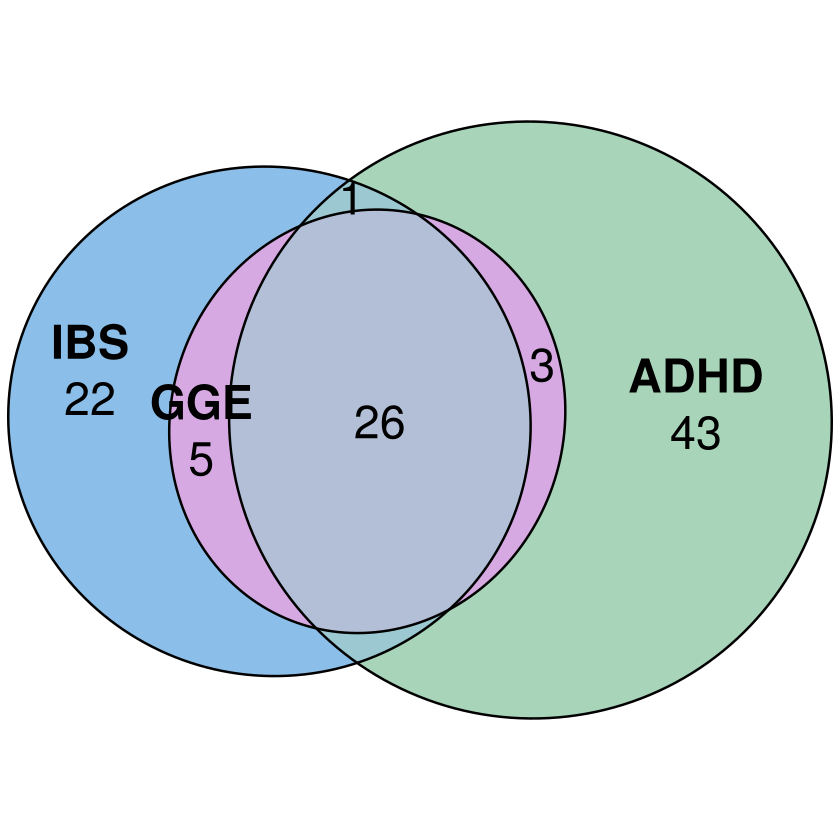

In [59]:
# Show, don't plot
label_fontsize = 28
number_fontsize = 28
edge_lty = 1:1
edge_color = "black"
alpha = 1

fit <- euler(vec2plot, input="disjoint", shape="ellipse")

plot(fit,
     fills = list(fill=colors, alpha=alpha),
     labels = list(labels=labels, col="black", fontsize=label_fontsize),
     edges = list(col=edge_color, lex=2),
     lty=edge_lty,
     quantities = list(type="counts", cex=1, fontsize=number_fontsize))

## Plot
png(filename=paste0(outf_model,".png"), width=600, height=600, units="px", pointsize=12, bg="transparent", res=NA)
plot(fit,
     fills = list(fill=colors, alpha=alpha),
     labels = list(labels=labels, col="black", fontsize=label_fontsize),
     edges = list(col=edge_color, lex=2),
     lty = edge_lty,
     quantities = list(type="counts", cex=1, fontsize=number_fontsize))
dev.off()

## Plot
svg(filename=paste0(outf_model,".svg"), onefile=TRUE)
plot(fit,
     fills = list(fill=colors, alpha=alpha),
     labels = list(labels=labels, col="black", fontsize=label_fontsize),
     edges = list(col=edge_color, lex=2),
     lty = edge_lty,
     quantities = list(type="counts", cex=1, fontsize=number_fontsize))
dev.off()

[1] "Min_p123 = 0.00108023006930158, Max_p123 = 0.00112424666806957"
[1] "Expected_p123 = 0.0010810223680794, Best_p123 = 0.00108023006930158"


png 
  2

png 
  2

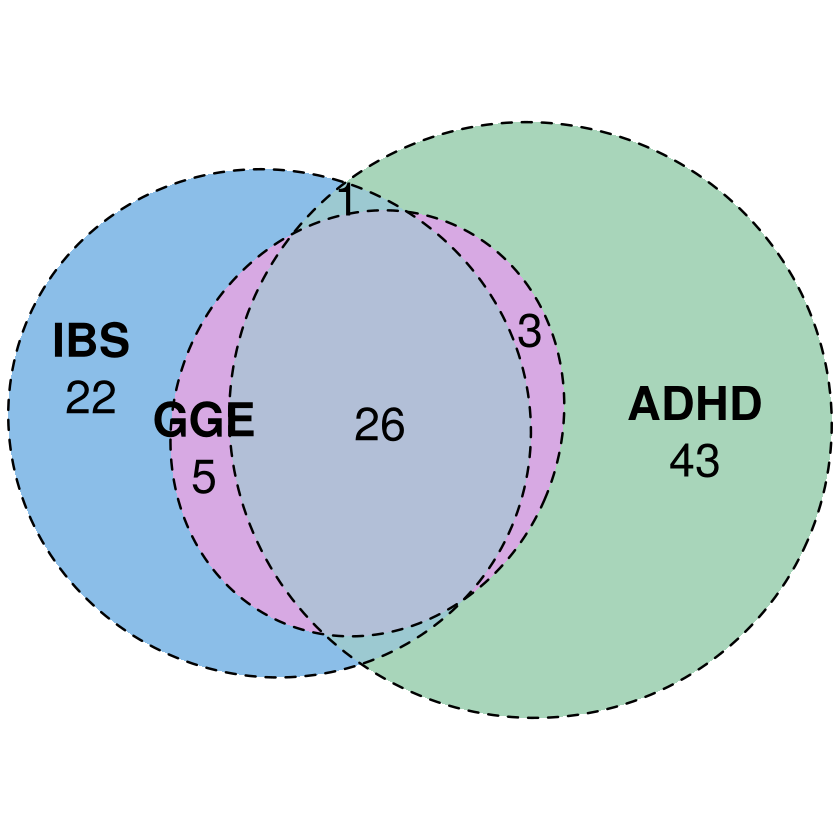

In [60]:
# plot naive expected
expected_p123 =  get_p123_with_max_entropy(best$p_1, best$p_2, best$p_3, best$p_12, best$p_13, best$p_23)
print(paste0("Expected_p123 = ", expected_p123, ", Best_p123 = ", best$p_123))

acceptable_negative_gap = 1E-6
p1 <- best$p_1 - best$p_12 - best$p_13 + expected_p123
if (p1<0 & p1>acceptable_negative_gap) {p1 <- 0}
p2 <- best$p_2 - best$p_12 - best$p_23 + expected_p123
if (p2<0 & p2>acceptable_negative_gap) {p2 <- 0}
p3 <- best$p_3 - best$p_13 - best$p_23 + expected_p123
if (p3<0 & p3>acceptable_negative_gap) {p3 <- 0}
p12 <- best$p_12 - expected_p123
if (p12<0 & p12>acceptable_negative_gap) {p12 <- 0}
p13 <- best$p_13 - expected_p123
if (p13<0 & p13>acceptable_negative_gap) {p13 <- 0}
p23 <- best$p_23 - expected_p123
if (p23<0 & p23>acceptable_negative_gap) {p23 <- 0}
p123 <- expected_p123
if (p123<0 & p1>acceptable_negative_gap) {p123 <- 0}
vec2plot = c("1"=round(factor*p1,0),"2"=round(factor*p2,0),"3"=round(factor*p3,0),"1&2"=round(factor*p12,0),"1&3"=round(factor*p13,0),"2&3"=round(factor*p23,0),"1&2&3"=round(factor*p123,0))
fit <- euler(vec2plot, input="disjoint", shape="ellipse")

# Show, don't plot
edge_lty = 2:2
edge_color = "black"

plot(fit,
     fills = list(fill=colors, alpha=alpha),
     labels = list(labels=labels, col="black", fontsize=label_fontsize),
     edges = list(col=edge_color, lex=2),
     lty = edge_lty,
     quantities = list(type="counts", cex=1, fontsize=number_fontsize)) # quantities=c("3","3","3","2","2","2","1")

# Plot
png(filename=paste0(outf_naive,".png"), width=600, height=600, units="px", pointsize=12, bg="transparent", res=NA)
plot(fit,
     fills = list(fill=colors, alpha=alpha),
     labels = list(labels=labels, col="black", fontsize=label_fontsize),
     edges = list(col=edge_color, lex=2),
     lty = edge_lty,
     quantities = list(type="counts", cex=1, fontsize=number_fontsize))
dev.off()

## Plot
svg(filename=paste0(outf_naive,".svg"), onefile=TRUE)
plot(fit,
     fills = list(fill=colors, alpha=alpha),
     labels = list(labels=labels, col="black", fontsize=label_fontsize),
     edges = list(col=edge_color, lex=2),
     lty = edge_lty,
     quantities = list(type="counts", cex=1, fontsize=number_fontsize))
dev.off()

# Figures from misc projects

In [714]:
# Figures from misc projects
#scenario = 'bip_lst_healthyfood_sept23_combined'; labels <- c('BIP', 'LST', 'HF'); colors <- c('#99DDFF', '#EE8866', '#BBCC33')
#scenario = 'bip_lst_meat_sept23_combined'; labels <- c('BIP', 'LST', 'Meat'); colors <- c('#99DDFF', '#EE8866', '#FFAABB')
#scenario = 'bip_lst_mvpa_sept23_combined'; labels <- c('BIP', 'LST', 'MVPA'); colors <- c('#99DDFF', '#EE8866', '#EEDD88')
#scenario = 'bip_meat_healthyfood_sept23_combined'; labels <- c('BIP', 'Meat', 'HF'); colors <- c('#99DDFF', '#FFAABB', '#BBCC33')
#scenario = 'bip_mvpa_healthyfood_sept23_combined'; labels <- c('BIP', 'MVPA', 'HF'); colors <- c('#99DDFF', '#EEDD88', '#BBCC33')
#scenario = 'bip_mvpa_meat_sept23_combined'; labels <- c('BIP', 'MVPA', 'Meat'); colors <- c('#99DDFF', '#EEDD88', '#FFAABB')
#scenario = 'mdd_lst_healthyfood_combined'; labels <- c('MDD', 'LST', 'HF'); colors <- c('#44BB99', '#EE8866', '#BBCC33')
#scenario = 'mdd_lst_meat_combined'; labels <- c('MDD', 'LST', 'Meat'); colors <- c('#44BB99', '#EE8866', '#FFAABB')
#scenario = 'mdd_lst_mvpa_combined'; labels <- c('MDD', 'LST', 'MVPA'); colors <- c('#44BB99', '#EE8866', '#EEDD88')
#scenario = 'mdd_meat_healthyfood_combined'; labels <- c('MDD', 'Meat', 'HF'); colors <- c('#44BB99', '#FFAABB', '#BBCC33')
#scenario = 'mdd_mvpa_healthyfood_combined'; labels <- c('MDD', 'MVPA', 'HF'); colors <- c('#44BB99', '#EEDD88', '#BBCC33')
#scenario = 'mdd_mvpa_meat_combined'; labels <- c('MDD', 'MVPA', 'Meat'); colors <- c('#44BB99', '#EEDD88', '#FFAABB')
#scenario = 'scz_lst_healthyfood_sept23_combined'; labels <- c('SCZ', 'LST', 'HF'); colors <- c('#77AADD', '#EE8866', '#BBCC33')
#scenario = 'scz_lst_meat_sept23_combined'; labels <- c('SCZ', 'LST', 'Meat'); colors <- c('#77AADD', '#EE8866', '#FFAABB')
#scenario = 'scz_lst_mvpa_sept23_combined'; labels <- c('SCZ', 'LST', 'MVPA'); colors <- c('#77AADD', '#EE8866', '#EEDD88')
#scenario = 'scz_meat_healthyfood_sept23_combined'; labels <- c('SCZ', 'Meat', 'HF'); colors <- c('#77AADD', '#FFAABB', '#BBCC33')
#scenario = 'scz_mvpa_healthyfood_sept23_combined'; labels <- c('SCZ', 'MVPA', 'HF'); colors <- c('#77AADD', '#EEDD88', '#BBCC33')
scenario = 'scz_mvpa_meat_sept23_combined'; labels <- c('SCZ', 'MVPA', 'Meat'); colors <- c('#77AADD', '#EEDD88', '#FFAABB')

#scenario = "bip_mvpa_healthyfood_sept23_combined"
fname <- paste0("figures/mix3r_physical_activity/",scenario,".parameters.csv")
#labels <- c("BIP", "MVPA", "HF")
outf_model <- paste0("figures/mix3r_physical_activity/", scenario, ".euler.model.draft")
outf_naive <- paste0("figures/mix3r_physical_activity/", scenario, ".euler.naive.draft")
outf_true <- paste0("figures/mix3r_physical_activity/", scenario, ".euler.true.draft")
#colors <- c('#99DDFF', '#EEDD88', '#BBCC33')
# SCZ: '#77AADD'
# BIP: '#99DDFF'
# MDD: '#44BB99'
# LST: '#EE8866'
# Meat: '#FFAABB'
# MVPA: '#EEDD88'
# HF: '#BBCC33',
df <- fread(fname)
print(dim(df))

[1] 12 28


[1] "1 is the best run."


png 
  2

png 
  2

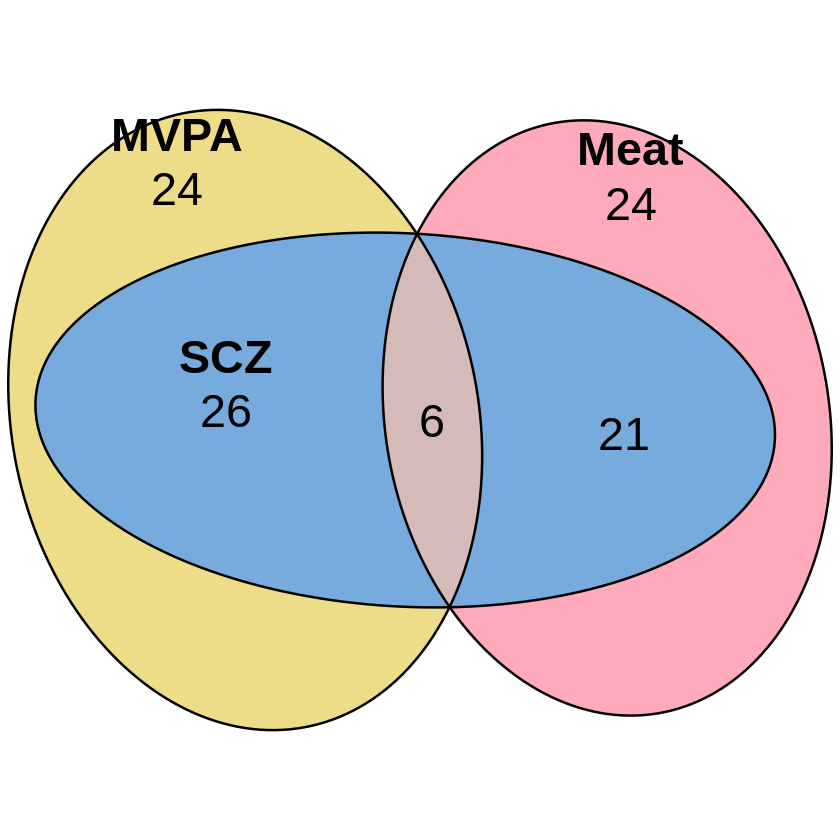

In [715]:
# Show, don't plot
label_fontsize = 28
number_fontsize = 28
edge_lty = 1:1
edge_color = "black"
alpha = 1

i_best_run = which.min(df$rank_p_proportion_deviation_from_median)
#i_best_run = 6 # ring2:6
print(paste(i_best_run, "is the best run."))
best = df[i_best_run]

acceptable_negative_gap = -1E-6
p1 <- best$p_1 - best$p_12 - best$p_13 + best$p_123
if (p1<0 & p1>acceptable_negative_gap) {p1 <- 0}
p2 <- best$p_2 - best$p_12 - best$p_23 + best$p_123
if (p2<0 & p2>acceptable_negative_gap) {p2 <- 0}
p3 <- best$p_3 - best$p_13 - best$p_23 + best$p_123
if (p3<0 & p3>acceptable_negative_gap) {p3 <- 0}
p12 <- best$p_12 - best$p_123
if (p12<0 & p12>acceptable_negative_gap) {p12 <- 0}
p13 <- best$p_13 - best$p_123
if (p13<0 & p13>acceptable_negative_gap) {p13 <- 0}
p23 <- best$p_23 - best$p_123
if (p23<0 & p23>acceptable_negative_gap) {p23 <- 0}
p123 <- best$p_123
if (p123<0 & p1>acceptable_negative_gap) {p123 <- 0}
total = p1 + p2 + p3 + p12 + p13 + p23 + p123
factor = 100 / total
vec2plot = c("1"=round(factor*p1,0),"2"=round(factor*p2,0),"3"=round(factor*p3,0),"1&2"=round(factor*p12,0),"1&3"=round(factor*p13,0),"2&3"=round(factor*p23,0),"1&2&3"=round(factor*p123,0))


fit <- euler(vec2plot, input="disjoint", shape="ellipse")

plot(fit,
     fills = list(fill=colors, alpha=alpha),
     labels = list(labels=labels, col="black", fontsize=label_fontsize),
     edges = list(col=edge_color, lex=2),
     lty=edge_lty,
     quantities = list(type="counts", cex=1, fontsize=number_fontsize))

## Plot
png(filename=paste0(outf_model,".png"), width=600, height=600, units="px", pointsize=12, bg="transparent", res=NA)
plot(fit,
     fills = list(fill=colors, alpha=alpha),
     labels = list(labels=labels, col="black", fontsize=label_fontsize),
     edges = list(col=edge_color, lex=2),
     lty = edge_lty,
     quantities = list(type="counts", cex=1, fontsize=number_fontsize))
dev.off()

## Plot
svg(filename=paste0(outf_model,".svg"), onefile=TRUE)
plot(fit,
     fills = list(fill=colors, alpha=alpha),
     labels = list(labels=labels, col="black", fontsize=label_fontsize),
     edges = list(col=edge_color, lex=2),
     lty = edge_lty,
     quantities = list(type="counts", cex=1, fontsize=number_fontsize))
dev.off()

[1] "0.000325, 0.000320"

png 
  2

png 
  2

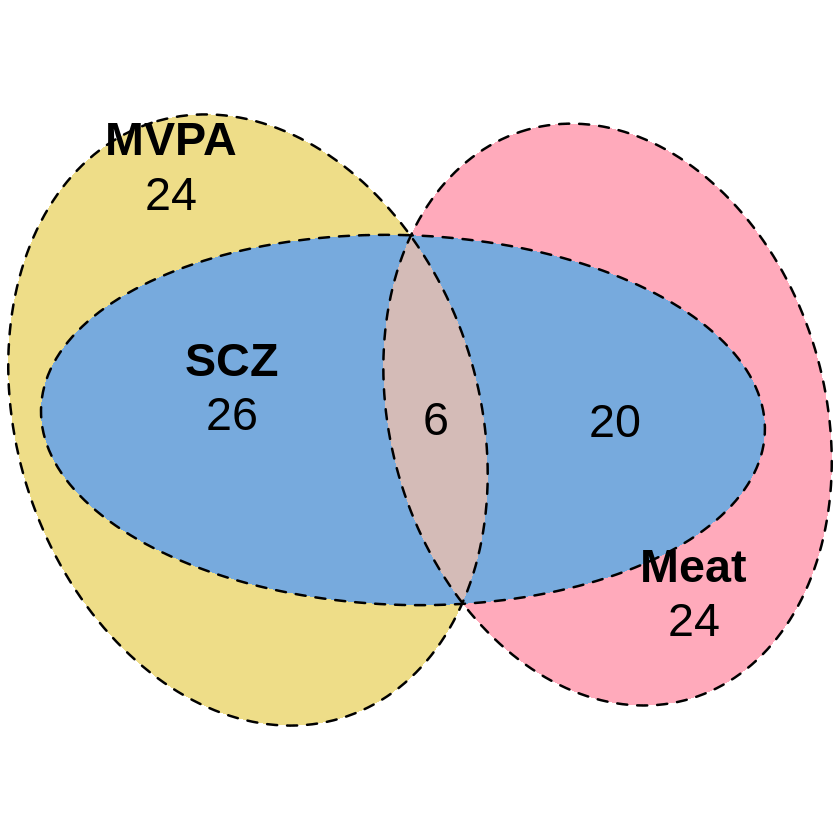

In [716]:
# plot naive expected
max_p123 = min(best$p_12,best$p_13,best$p_23)
min_p123 = max(0,best$p_12+best$p_13-best$p_1,best$p_12+best$p_23-best$p_2,best$p_13+best$p_23-best$p_3)
expected_p123 =  0.5*(min_p123 + max_p123)
sprintf("%f, %f", expected_p123, best$p_123)

acceptable_negative_gap = 1E-6
p1 <- best$p_1 - best$p_12 - best$p_13 + expected_p123
if (p1<0 & p1>acceptable_negative_gap) {p1 <- 0}
p2 <- best$p_2 - best$p_12 - best$p_23 + expected_p123
if (p2<0 & p2>acceptable_negative_gap) {p2 <- 0}
p3 <- best$p_3 - best$p_13 - best$p_23 + expected_p123
if (p3<0 & p3>acceptable_negative_gap) {p3 <- 0}
p12 <- best$p_12 - expected_p123
if (p12<0 & p12>acceptable_negative_gap) {p12 <- 0}
p13 <- best$p_13 - expected_p123
if (p13<0 & p13>acceptable_negative_gap) {p13 <- 0}
p23 <- best$p_23 - expected_p123
if (p23<0 & p23>acceptable_negative_gap) {p23 <- 0}
p123 <- expected_p123
if (p123<0 & p1>acceptable_negative_gap) {p123 <- 0}
vec2plot = c("1"=round(factor*p1,0),"2"=round(factor*p2,0),"3"=round(factor*p3,0),"1&2"=round(factor*p12,0),"1&3"=round(factor*p13,0),"2&3"=round(factor*p23,0),"1&2&3"=round(factor*p123,0))
fit <- euler(vec2plot, input="disjoint", shape="ellipse")

# Show, don't plot
edge_lty = 2:2
edge_color = "black"

plot(fit,
     fills = list(fill=colors, alpha=alpha),
     labels = list(labels=labels, col="black", fontsize=label_fontsize),
     edges = list(col=edge_color, lex=2),
     lty = edge_lty,
     quantities = list(type="counts", cex=1, fontsize=number_fontsize)) # quantities=c("3","3","3","2","2","2","1")

# Plot
png(filename=paste0(outf_naive,".png"), width=600, height=600, units="px", pointsize=12, bg="transparent", res=NA)
plot(fit,
     fills = list(fill=colors, alpha=alpha),
     labels = list(labels=labels, col="black", fontsize=label_fontsize),
     edges = list(col=edge_color, lex=2),
     lty = edge_lty,
     quantities = list(type="counts", cex=1, fontsize=number_fontsize))
dev.off()

## Plot
svg(filename=paste0(outf_naive,".svg"), onefile=TRUE)
plot(fit,
     fills = list(fill=colors, alpha=alpha),
     labels = list(labels=labels, col="black", fontsize=label_fontsize),
     edges = list(col=edge_color, lex=2),
     lty = edge_lty,
     quantities = list(type="counts", cex=1, fontsize=number_fontsize))
dev.off()

In [51]:
get_pvec <- function(P1, P2, P3, P12, P13, P23, P123) {
    p1 = P1 - P12 - P13 + P123
    p2 = P2 - P12 - P23 + P123
    p3 = P3 - P13 - P23 + P123
    p12 = P12 - P123
    p13 = P13 - P123
    p23 = P23 - P123
    p123 = P123
    pvec = c(p1, p2, p3, p12, p13, p23, p123)
    return ( pvec/sum(pvec) )
}

get_entropy <- function(pvec) {
    entropy = 0
    for ( p in pvec ) {
        entropy = entropy + ifelse(p > 0, -p*log(p), 0)
    }
    return ( entropy )    
}

get_p123_with_max_entropy <- function(P1, P2, P3, P12, P13, P23) {
    max_P123 = min(P12, P13, P23)
    min_P123 = max(0, P12+P13-P1, P12+P23-P2, P13+P23-P3)
    print(paste0("Min_p123 = ", min_P123, ", Max_p123 = ", max_P123))
    max_entropy = 0
    max_entropy_P123 = 0
    for ( P123 in seq(from=min_P123, to=max_P123, length.out=1001) ) {
        pvec = get_pvec(P1, P2, P3, P12, P13, P23, P123)
        entropy = get_entropy(pvec)
        if ( entropy > max_entropy ) {
            max_entropy = entropy   
            max_entropy_P123 = P123
        }
    }
    return ( max_entropy_P123 )
}

get_mutual_information <- function(pvec, qvec) {
    mutual_inf = 0
    
    for (i in 1:length(pvec)) {
        p = pvec[i]
        q = qvec[i]
        min_pq = min(p,q)
        max_pq = max(p,q)
        if ( max_pq > 0) {
            mutual_inf = mutual_inf + 
        }
    }
    for ( p in pvec ) {
        entropy = entropy + ifelse(p > 0, -p*log(p), 0)
    }
    return ( entropy )    
}

In [52]:
P1 = 0.2
P2 = 0.2
P3 = 0.2
P12 = 0.1
P13 = 0.1
P23 = 0.1
P123 = 0.1
pvec = get_pvec(P1, P2, P3, P12, P13, P23, P123)

In [53]:
get_entropy(pvec)

[1] 1.386294

In [54]:
get_p123_with_max_entropy(P1, P2, P3, P12, P13, P23)

[1] "Min_p123 = 0, Max_p123 = 0.1"


[1] 0.05

# Quantifying diviation between patterns.

In [ ]:
# Figure 1 for paper
outf_prefix = "figure1_dec21"
scenario = "ring" # diffusion core ring
fname <- paste0("figures/simu_maf1_",scenario,"2_sep12.parameters.csv")
df <- fread(fname)
print(dim(df))
i_best_run = which.min(df$rank_p_proportion_deviation_from_median)
print(paste(i_best_run, "is the best run."))
best = df[i_best_run]

acceptable_negative_gap = -1E-6
p1 <- best$p_1 - best$p_12 - best$p_13 + best$p_123
if (p1<0 & p1>acceptable_negative_gap) {p1 <- 0}
p2 <- best$p_2 - best$p_12 - best$p_23 + best$p_123
if (p2<0 & p2>acceptable_negative_gap) {p2 <- 0}
p3 <- best$p_3 - best$p_13 - best$p_23 + best$p_123
if (p3<0 & p3>acceptable_negative_gap) {p3 <- 0}
p12 <- best$p_12 - best$p_123
if (p12<0 & p12>acceptable_negative_gap) {p12 <- 0}
p13 <- best$p_13 - best$p_123
if (p13<0 & p13>acceptable_negative_gap) {p13 <- 0}
p23 <- best$p_23 - best$p_123
if (p23<0 & p23>acceptable_negative_gap) {p23 <- 0}
p123 <- best$p_123
if (p123<0 & p1>acceptable_negative_gap) {p123 <- 0}
total = p1 + p2 + p3 + p12 + p13 + p23 + p123
factor = 100 / total
vec2plot = c("1"=round(factor*p1,0),"2"=round(factor*p2,0),"3"=round(factor*p3,0),"1&2"=round(factor*p12,0),"1&3"=round(factor*p13,0),"2&3"=round(factor*p23,0),"1&2&3"=round(factor*p123,0))

In [3]:
min(1,2,3,6,4,-1)

[1] -1

In [18]:
# bdbiobank_bdclinical_bdselfreport_1kg_oct30.parameters.csv
scenario = "bdbiobank_bdclinical_bdselfreport_1kg_oct30"
fname <- paste0("figures/",scenario,".parameters.csv")
labels <- c("Community", "Clinical", "Self-report")
outf_model <- paste0("figures/", scenario, ".euler.model")
outf_naive <- paste0("figures/", scenario, ".euler.naive")
colors <- c('#99DDFF', '#EE8866', '#EEDD88')
df <- fread(fname)
print(dim(df))
i_best_run = which.min(df$rank_p_proportion_deviation_from_median)
#i_best_run = 6 # ring2:6
print(paste(i_best_run, "is the best run."))
best = df[i_best_run]

acceptable_negative_gap = -1E-6
p1 <- best$p_1 - best$p_12 - best$p_13 + best$p_123
if (p1<0 & p1>acceptable_negative_gap) {p1 <- 0}
p2 <- best$p_2 - best$p_12 - best$p_23 + best$p_123
if (p2<0 & p2>acceptable_negative_gap) {p2 <- 0}
p3 <- best$p_3 - best$p_13 - best$p_23 + best$p_123
if (p3<0 & p3>acceptable_negative_gap) {p3 <- 0}
p12 <- best$p_12 - best$p_123
if (p12<0 & p12>acceptable_negative_gap) {p12 <- 0}
p13 <- best$p_13 - best$p_123
if (p13<0 & p13>acceptable_negative_gap) {p13 <- 0}
p23 <- best$p_23 - best$p_123
if (p23<0 & p23>acceptable_negative_gap) {p23 <- 0}
p123 <- best$p_123
if (p123<0 & p1>acceptable_negative_gap) {p123 <- 0}
total = p1 + p2 + p3 + p12 + p13 + p23 + p123
factor = 100 / total
vec2plot = c("1"=round(factor*p1,0),"2"=round(factor*p2,0),"3"=round(factor*p3,0),"1&2"=round(factor*p12,0),"1&3"=round(factor*p13,0),"2&3"=round(factor*p23,0),"1&2&3"=round(factor*p123,0))

[1] 16 34
[1] "8 is the best run."


value: 0


png 
  2

png 
  2

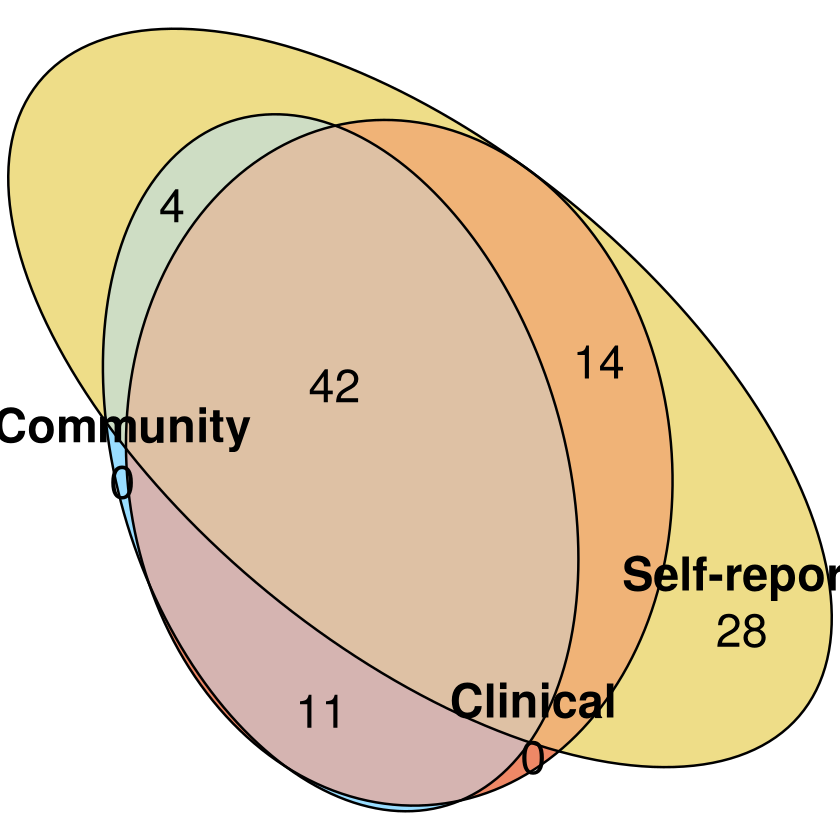

In [19]:
# Show, don't plot
label_fontsize = 28
number_fontsize = 28
edge_lty = 1:1
edge_color = "black"
alpha = 1

fit <- euler(vec2plot, input="disjoint", shape="ellipse")

plot(fit,
     fills = list(fill=colors, alpha=alpha),
     labels = list(labels=labels, col="black", fontsize=label_fontsize),
     edges = list(col=edge_color, lex=2),
     lty=edge_lty,
     quantities = list(type="counts", cex=1, fontsize=number_fontsize))

## Plot
png(filename=paste0(outf_model,".png"), width=600, height=600, units="px", pointsize=12, bg="transparent", res=NA)
plot(fit,
     fills = list(fill=colors, alpha=alpha),
     labels = list(labels=labels, col="black", fontsize=label_fontsize),
     edges = list(col=edge_color, lex=2),
     lty = edge_lty,
     quantities = list(type="counts", cex=1, fontsize=number_fontsize))
dev.off()

## Plot
svg(filename=paste0(outf_model,".svg"), onefile=TRUE)
plot(fit,
     fills = list(fill=colors, alpha=alpha),
     labels = list(labels=labels, col="black", fontsize=label_fontsize),
     edges = list(col=edge_color, lex=2),
     lty = edge_lty,
     quantities = list(type="counts", cex=1, fontsize=number_fontsize))
dev.off()

[1] "Min_p123 = 0.00146288777305633, Max_p123 = 0.00161139599881051"
[1] "Expected_p123 = 0.0015326866391608, Best_p123 = 0.00146288777305633"


png 
  2

png 
  2

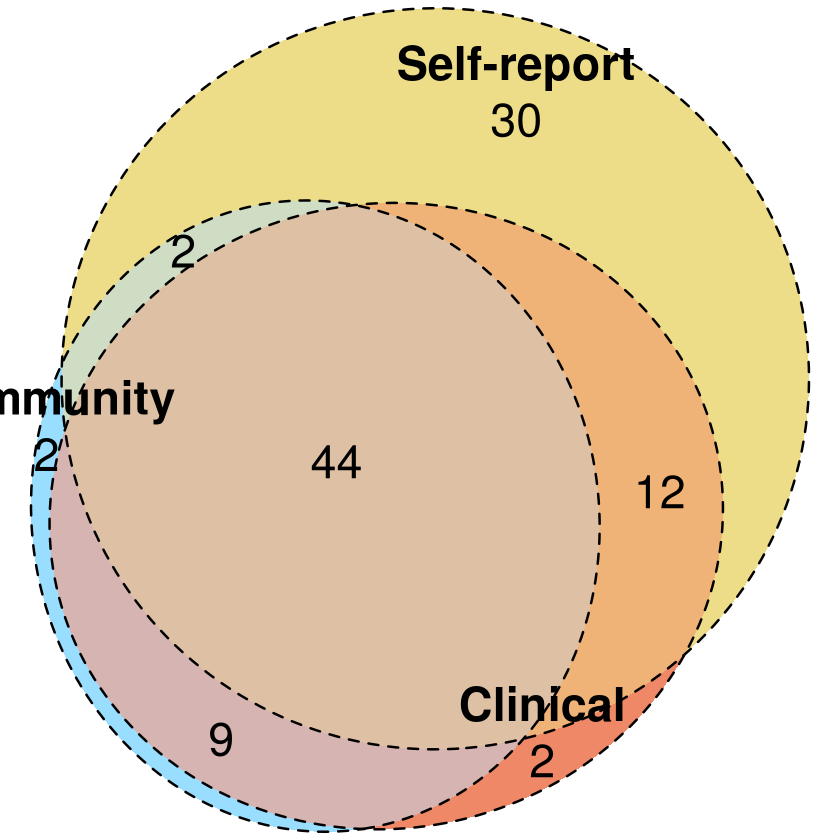

In [16]:
# plot naive expected
expected_p123 =  get_p123_with_max_entropy(best$p_1, best$p_2, best$p_3, best$p_12, best$p_13, best$p_23)
print(paste0("Expected_p123 = ", expected_p123, ", Best_p123 = ", best$p_123))

acceptable_negative_gap = 1E-6
p1 <- best$p_1 - best$p_12 - best$p_13 + expected_p123
if (p1<0 & p1>acceptable_negative_gap) {p1 <- 0}
p2 <- best$p_2 - best$p_12 - best$p_23 + expected_p123
if (p2<0 & p2>acceptable_negative_gap) {p2 <- 0}
p3 <- best$p_3 - best$p_13 - best$p_23 + expected_p123
if (p3<0 & p3>acceptable_negative_gap) {p3 <- 0}
p12 <- best$p_12 - expected_p123
if (p12<0 & p12>acceptable_negative_gap) {p12 <- 0}
p13 <- best$p_13 - expected_p123
if (p13<0 & p13>acceptable_negative_gap) {p13 <- 0}
p23 <- best$p_23 - expected_p123
if (p23<0 & p23>acceptable_negative_gap) {p23 <- 0}
p123 <- expected_p123
if (p123<0 & p1>acceptable_negative_gap) {p123 <- 0}
vec2plot = c("1"=round(factor*p1,0),"2"=round(factor*p2,0),"3"=round(factor*p3,0),"1&2"=round(factor*p12,0),"1&3"=round(factor*p13,0),"2&3"=round(factor*p23,0),"1&2&3"=round(factor*p123,0))
fit <- euler(vec2plot, input="disjoint", shape="ellipse")

# Show, don't plot
edge_lty = 2:2
edge_color = "black"

plot(fit,
     fills = list(fill=colors, alpha=alpha),
     labels = list(labels=labels, col="black", fontsize=label_fontsize),
     edges = list(col=edge_color, lex=2),
     lty = edge_lty,
     quantities = list(type="counts", cex=1, fontsize=number_fontsize)) # quantities=c("3","3","3","2","2","2","1")

# Plot
png(filename=paste0(outf_naive,".png"), width=600, height=600, units="px", pointsize=12, bg="transparent", res=NA)
plot(fit,
     fills = list(fill=colors, alpha=alpha),
     labels = list(labels=labels, col="black", fontsize=label_fontsize),
     edges = list(col=edge_color, lex=2),
     lty = edge_lty,
     quantities = list(type="counts", cex=1, fontsize=number_fontsize))
dev.off()

## Plot
svg(filename=paste0(outf_naive,".svg"), onefile=TRUE)
plot(fit,
     fills = list(fill=colors, alpha=alpha),
     labels = list(labels=labels, col="black", fontsize=label_fontsize),
     edges = list(col=edge_color, lex=2),
     lty = edge_lty,
     quantities = list(type="counts", cex=1, fontsize=number_fontsize))
dev.off()